In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import Image

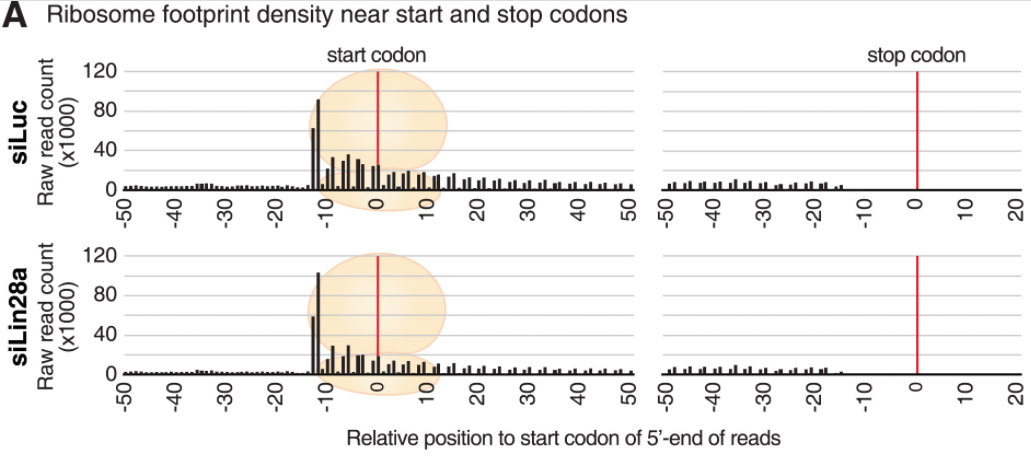

In [16]:
Image(filename='s5a_figure.png') 

In [4]:
data = pd.read_csv('fivepcounts-filtered-RPF-siLuc.txt', sep = '\t',header=None)

In [13]:
data.columns = ['chromosome', 'fivep_start_p', 'fivep_end_p', 'read_depth', 'exon_chr', 'exon_start_p', 'exon_end_p', 'transcript_id', 'start_codon_p', 'strand']

In [17]:
data['relative_p'] = data['fivep_start_p']- data['start_codon_p'] 

In [19]:
data_screened = data[(data['relative_p'] >= -50) & (data['relative_p'] <= 50)]

In [26]:
temp = data_screened.groupby('relative_p').sum().reset_index()

In [28]:
temp['read_depth_scaled'] = temp['read_depth'] / 1000

In [165]:
temp

,relative_p,fivep_start_p,fivep_end_p,read_depth,exon_start_p,exon_end_p,start_codon_p,read_depth_scaled
0,-50,46804059887,46804060551,2878,46803986467,46804196542,46804089237,2.878
1,-49,51536110368,51536111099,2556,51536028674,51536246837,51536141630,2.556
2,-48,51886141378,51886142086,2366,51886065062,51886280679,51886172338,2.366
3,-47,52728012632,52728013434,3442,52727932510,52728161961,52728045250,3.442
4,-46,45157603403,45157604071,2656,45157526471,45157724324,45157630405,2.656
...,...,...,...,...,...,...,...,...
96,46,42319631831,42319632429,1077,42319549275,42319709326,42319607819,1.077
97,47,104843772246,104843773706,4401,104843579739,104844018176,104843712133,4.401
98,48,102777151585,102777152986,4608,102776936674,102777400414,102777088609,4.608
99,49,36910583895,36910584416,777,36910510566,36910673067,36910561502,0.777


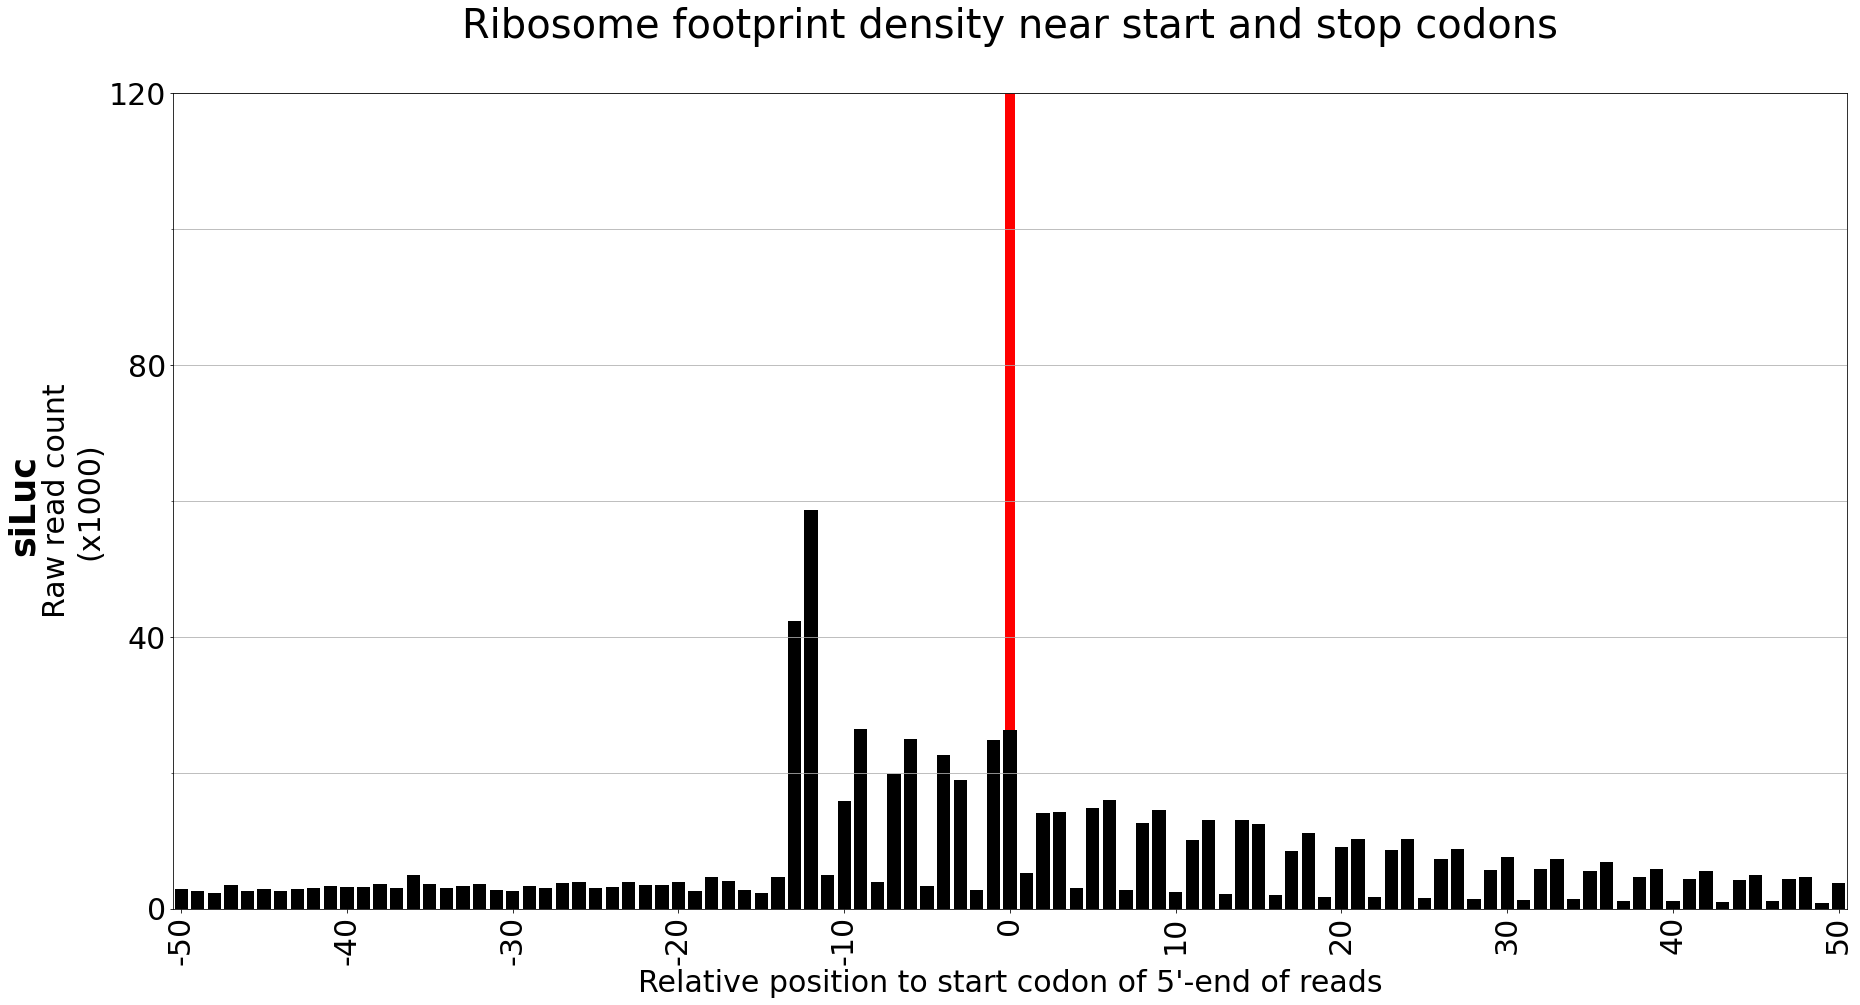

In [178]:
major_tick = [0, 40, 80, 120]
minor_tick = [20, 60, 100]
major_tick_2 = [-50,-40,-30,-20,-10,0,10,20,30,40,50]
plt.figure(figsize=(30,15))
plt.title('Ribosome footprint density near start and stop codons\n', fontsize = 40)
plt.bar(50, 120, color='red', width = 0.6)
ax = sns.barplot(data=temp, x='relative_p', y='read_depth_scaled', color='black')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(fontsize=30, rotation = 90)
ax.set_yticks(major_tick)
ax.set_yticks(minor_tick, minor=True)
plt.yticks(fontsize=30)
plt.ylim(0,120)
plt.grid(which='both', axis='y')
plt.ylabel('Raw read count\n(x1000)', fontsize=30)
plt.xlabel("Relative position to start codon of 5'-end of reads", fontsize=30)
plt.text(-10.5, 53, 'siLuc', fontsize=35, fontweight='bold', rotation = 90)
plt.savefig('mission_2_siluc_figure.pdf', dpi = 600)